<a href="https://colab.research.google.com/github/Satwik-1234/Gooble-collab-Scripts-/blob/main/Piping_breach_graphs_BORI_DAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Piping Breach hydrograph.xlsx to Piping Breach hydrograph (1).xlsx


In [2]:
!pip install plotly --quiet

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use("seaborn-v0_8-whitegrid")


In [3]:
# ===============================
# LOAD EXCEL FILE
# ===============================
file_path = "/content/Piping Breach hydrograph.xlsx"  # change if filename differs

df = pd.read_excel(file_path)

df.head()


,ordinate,Date and time,stage HW elevation,stage TW elevation,TOTAL flow CMS,Breach Flow CMS
0,1,20Jan2026 2400,459.1,446.50,0.00,0.00
1,2,21Jan2026 0005,459.1,447.95,74.88,0.00
2,3,21Jan2026 0010,459.1,447.27,0.04,0.04
3,4,21Jan2026 0015,459.1,447.92,75.10,0.22
4,5,21Jan2026 0020,459.1,447.41,1.00,1.00


In [4]:
df.columns


Index(['ordinate ', 'Date and time ', 'stage HW elevation',
       'stage TW elevation', 'TOTAL flow CMS ', 'Breach Flow CMS '],
      dtype='object')

In [5]:
df = df.rename(columns={
    "Time": "Time",
    "Total Flow (cms)": "Total_Flow",
    "Breach Flow (cms)": "Breach_Flow",
    "HW Elevation (m)": "HW_Stage",
    "TW Elevation (m)": "TW_Stage"
})


In [9]:
df.columns = df.columns.str.strip()

# Replace '2400' with '0000' and convert to datetime
def custom_date_parser(date_str):
    if '2400' in date_str:
        date_str_modified = date_str.replace('2400', '0000')
        dt = pd.to_datetime(date_str_modified, format='%d%b%Y %H%M')
        return dt + pd.Timedelta(days=1)
    else:
        return pd.to_datetime(date_str, format='%d%b%Y %H%M')

df['Date and time'] = df['Date and time'].apply(custom_date_parser)

# **OUTPUT 1: STUDIO-QUALITY STATIC GRAPH (Matplotlib)**

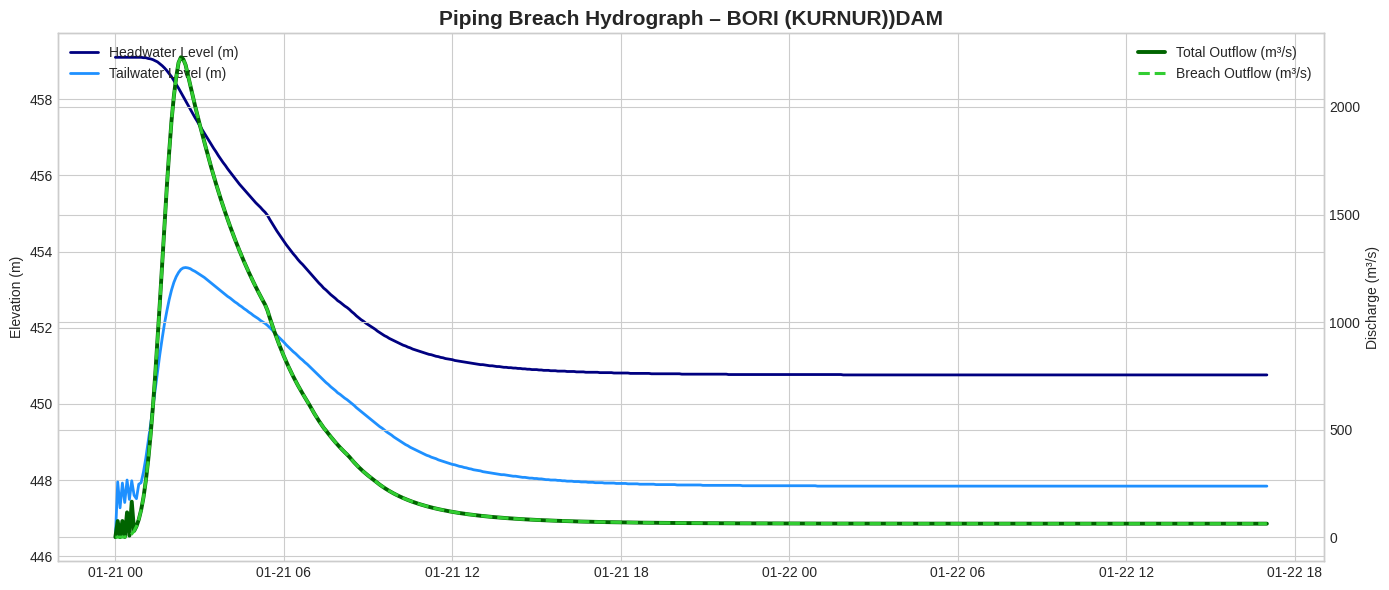

In [27]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# --- Water Levels ---
ax1.plot(df["Date and time"], df["stage HW elevation"], color="navy", lw=2, label="Headwater Level (m)")
ax1.plot(df["Date and time"], df["stage TW elevation"], color="dodgerblue", lw=2, label="Tailwater Level (m)")
ax1.set_ylabel("Elevation (m)")
ax1.legend(loc="upper left")

# --- Discharge ---
ax2 = ax1.twinx()
ax2.plot(df["Date and time"], df["TOTAL flow CMS"], color="darkgreen", lw=2.8, label="Total Outflow (m³/s)")
ax2.plot(df["Date and time"], df["Breach Flow CMS"], color="limegreen", lw=2.2,
         linestyle="--", label="Breach Outflow (m³/s)")
ax2.set_ylabel("Discharge (m³/s)")
ax2.legend(loc="upper right")

plt.title(
    "Piping Breach Hydrograph – BORI (KURNUR))DAM",
    fontsize=15, fontweight="bold"
)

plt.xlabel("Time")
plt.tight_layout()
plt.show()

# **OUTPUT 2: INTERACTIVE STUDIO GRAPH (Plotly)**

In [28]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]]
)

# Water Levels
fig.add_trace(
    go.Scatter(x=df["Date and time"], y=df["stage HW elevation"],
               name="Headwater Level (m)",
               line=dict(color="navy", width=2)),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(x=df["Date and time"], y=df["stage TW elevation"],
               name="Tailwater Level (m)",
               line=dict(color="dodgerblue", width=2)),
    secondary_y=False
)

# Discharges
fig.add_trace(
    go.Scatter(x=df["Date and time"], y=df["TOTAL flow CMS"],
               name="Total Outflow (m³/s)",
               line=dict(color="darkgreen", width=3)),
    secondary_y=True
)

fig.add_trace(
    go.Scatter(x=df["Date and time"], y=df["Breach Flow CMS"],
               name="Breach Outflow (m³/s)",
               line=dict(color="limegreen", dash="dash")),
    secondary_y=True
)

fig.update_layout(
    title="Piping Breach Hydrograph – (Kurnur) BORI DAM",
    template="plotly_white",
    height=550,
    hovermode="x unified",
    legend=dict(orientation="h", y=1.12)
)

fig.update_yaxes(title_text="Elevation (m)", secondary_y=False)
fig.update_yaxes(title_text="Discharge (m³/s)", secondary_y=True)
fig.update_xaxes(title_text="Time")

fig.show()


# **GRAPH 1 — HEADWATER & TAILWATER ELEVATION**

(Hydraulic Head & Reservoir Control)

In [19]:
# Peak Headwater
peak_hw = df.loc[df["stage HW elevation"].idxmax()]

fig1 = go.Figure()

fig1.add_trace(go.Scatter(
    x=df["Date and time"], y=df["stage HW elevation"],
    name="Headwater Elevation (m)",
    mode="lines",
    line=dict(color="navy", width=3)
))

fig1.add_trace(go.Scatter(
    x=df["Date and time"], y=df["stage TW elevation"],
    name="Tailwater Elevation (m)",
    mode="lines",
    line=dict(color="deepskyblue", width=3)
))

# Peak marker
fig1.add_trace(go.Scatter(
    x=[peak_hw["Date and time"]],
    y=[peak_hw["stage HW elevation"]],
    mode="markers",
    marker=dict(color="red", size=9),
    name="Peak Headwater Level"
))

fig1.add_annotation(
    x=peak_hw["Date and time"],
    y=peak_hw["stage HW elevation"],
    text=f"Peak HW: {peak_hw['stage HW elevation']:.2f} m<br>{peak_hw['Date and time']}",
    showarrow=True,
    arrowhead=2
)

# Central technical note
fig1.add_annotation(
    x=0.5, y=0.15, xref="paper", yref="paper",
    text=(
        "<b>Hydraulic Interpretation</b><br>"
        "• Headwater governs driving head for piping erosion<br>"
        "• Tailwater influences exit gradient and breach capacity<br>"
        "• Peak headwater coincides with critical internal erosion phase"
    ),
    showarrow=False,
    align="left",
    bgcolor="rgba(255,255,255,0.85)",
    bordercolor="black",
    borderwidth=1
)

fig1.update_layout(
    title="<b>Reservoir Water Levels During Piping Breach</b><br>Kurnur (Bori) Dam, Solapur",
    template="plotly_white",
    height=520,
    xaxis=dict(
        title="Time",
        tickfont=dict(size=12),
        showgrid=True
    ),
    yaxis=dict(
        title="Elevation (m)",
        tickfont=dict(size=12),
        showgrid=True
    ),
    legend=dict(
        x=1.05, y=0.5,
        xanchor="left",
        yanchor="middle",
        bordercolor="black",
        borderwidth=1
    )
)

fig1.show()

# Independant Plots of the stage and discharge of **Matplotlib**

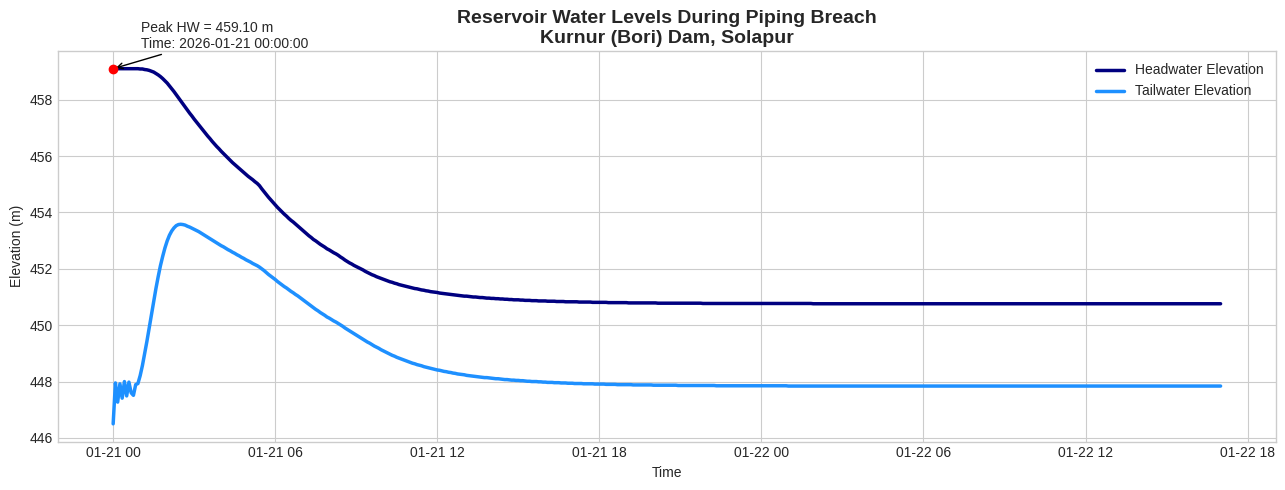

In [15]:
# Peak water level
peak_hw = df.loc[df["stage HW elevation"].idxmax()]

plt.figure(figsize=(13,5))
plt.plot(df["Date and time"], df["stage HW elevation"], lw=2.5, color="navy", label="Headwater Elevation")
plt.plot(df["Date and time"], df["stage TW elevation"], lw=2.5, color="dodgerblue", label="Tailwater Elevation")

plt.scatter(peak_hw["Date and time"], peak_hw["stage HW elevation"], color="red", zorder=5)
plt.annotate(
    f"Peak HW = {peak_hw['stage HW elevation']:.2f} m\nTime: {peak_hw['Date and time']}",
    xy=(peak_hw["Date and time"], peak_hw["stage HW elevation"]),
    xytext=(20,15),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->")
)

plt.title("Reservoir Water Levels During Piping Breach\nKurnur (Bori) Dam, Solapur", fontsize=14, fontweight="bold")
plt.ylabel("Elevation (m)")
plt.xlabel("Time")
plt.legend()
plt.tight_layout()
plt.show()

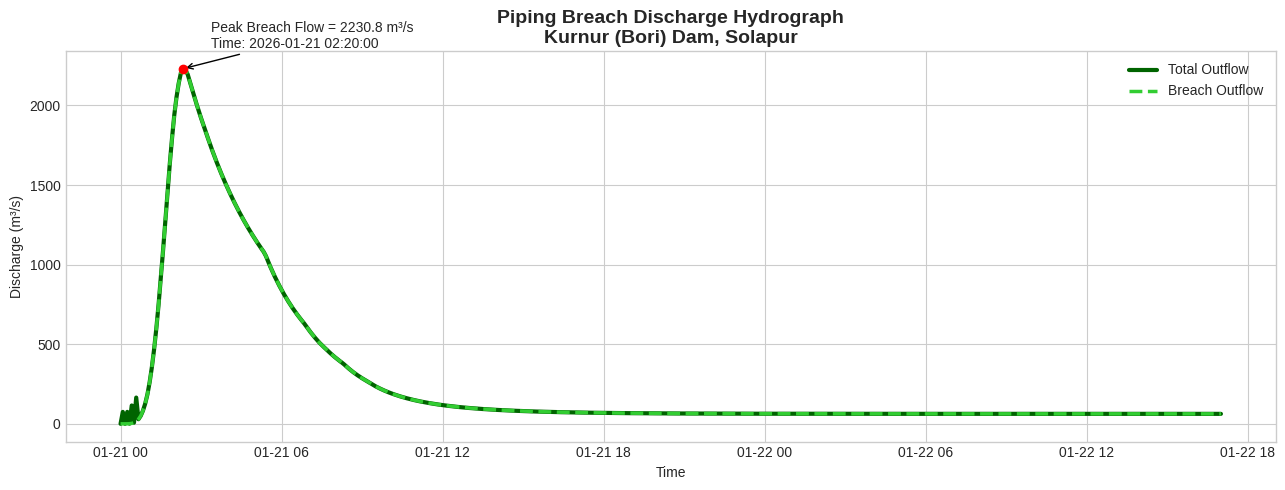

In [17]:
# Peak breach flow
peak_q = df.loc[df["Breach Flow CMS"].idxmax()]

plt.figure(figsize=(13,5))
plt.plot(df["Date and time"], df["TOTAL flow CMS"], lw=3, color="darkgreen", label="Total Outflow")
plt.plot(df["Date and time"], df["Breach Flow CMS"], lw=2.5, color="limegreen", linestyle="--", label="Breach Outflow")

plt.scatter(peak_q["Date and time"], peak_q["Breach Flow CMS"], color="red", zorder=5)
plt.annotate(
    f"Peak Breach Flow = {peak_q['Breach Flow CMS']:.1f} m³/s\nTime: {peak_q['Date and time']}",
    xy=(peak_q["Date and time"], peak_q["Breach Flow CMS"]),
    xytext=(20,15),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->")
)

plt.title("Piping Breach Discharge Hydrograph\nKurnur (Bori) Dam, Solapur", fontsize=14, fontweight="bold")
plt.ylabel("Discharge (m³/s)")
plt.xlabel("Time")
plt.legend()
plt.tight_layout()
plt.show()